In [ ]:
# Today, AI is everywhere, we are able to do many things with it.
# I will be exploring one of the key areas within AI, classification, which is a field currently under research, and we have not fully yet found out the limitations
# We've trained AI which can classify animals, plants, cars, and medicine, among other things.
# However, the main problem in hand revolves around the AI's capability to effectively classify manipulated images and the extent of training required to enable the AI to reliably detect these altered images.
# This is where the AI is most vulnerable as it is not able to adapt quickly to evolving image manipulation techniques and this is what I will be aiming to research and come to a solution where I aim to see how easily I can manipulate the AI into classifying the hacked images.


In [ ]:
!pip install tensorflow-datasets
import tensorflow as tf
import tensorflow_datasets as tfds

(train_ds, val_ds, test_ds), metadata = tfds.load(
    'oxford_flowers102',
    with_info=True,
    as_supervised=True,
)

#This was my first attempt to export the dataset using a Library rather than mounting each time, as I was using Google's GPUS.

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/1020 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/oxford_flowers102/2.1.1.incompleteX71AK6/oxford_flowers102-train.tfrecord*…

Generating test examples...:   0%|          | 0/6149 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/oxford_flowers102/2.1.1.incompleteX71AK6/oxford_flowers102-test.tfrecord*.…

Generating validation examples...:   0%|          | 0/1020 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/oxford_flowers102/2.1.1.incompleteX71AK6/oxford_flowers102-validation.tfre…

Dataset oxford_flowers102 downloaded and prepared to /root/tensorflow_datasets/oxford_flowers102/2.1.1. Subsequent calls will reuse this data.


In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
oxford_dataset, oxford_info = tfds.load(
    'oxford_flowers102',
    split='test',
    with_info=True,
    as_supervised=True
)
total_images = oxford_info.splits['test'].num_examples
print("Total number of images in the Oxford Flowers 102 test split:", total_images)


Total number of images in the Oxford Flowers 102 test split: 6149


In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
(train_ds, val_ds, test_ds), metadata = tfds.load(
    'oxford_flowers102',
    split=['train[:40%]', 'train[40%:70%]', 'train[70%:]'],
    with_info=True,
    as_supervised=True,
)
num_train_examples = metadata.splits['train[:40%]'].num_examples
num_val_examples = metadata.splits['train[40%:70%]'].num_examples
num_test_examples = metadata.splits['train[70%:]'].num_examples

print("Number of training examples:", num_train_examples)
print("Number of validation examples:", num_val_examples)
print("Number of test examples:", num_test_examples)
print("Total number of images in the Oxford Flowers 102 test split:", total_images)


Number of training examples: 408
Number of validation examples: 306
Number of test examples: 306
Total number of images in the Oxford Flowers 102 test split: 6149


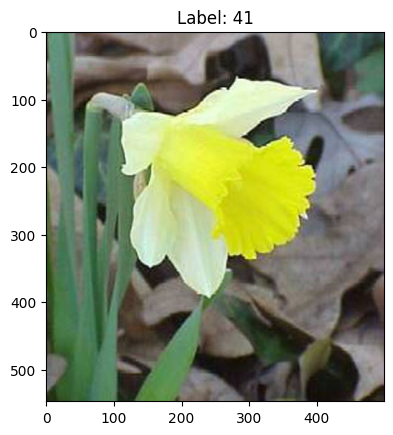

In [ ]:

dataset, info = tfds.load('oxford_flowers102', with_info=True, as_supervised=True)
image_index = 33  # we can change this to access a different image
for i, (image, label) in enumerate(dataset['train'].as_numpy_iterator()):
    if i == image_index:
        selected_image = image
        selected_label = label
        break

plt.imshow(selected_image)
plt.title(f"Label: {selected_label}")
plt.show()

#Here we are just getting the images and seeing the labels to ensure we get the correct labels, this is just a test

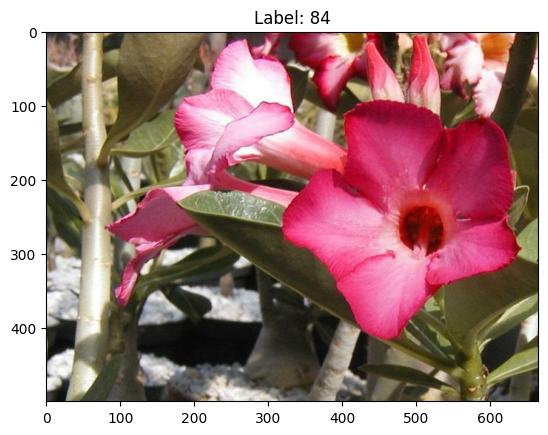

In [ ]:
dataset, info = tfds.load('oxford_flowers102', with_info=True, as_supervised=True)
image_index = 1  # We can change this to access a different image
for i, (image, label) in enumerate(dataset['train'].as_numpy_iterator()):
    if i == image_index:
        selected_image = image
        selected_label = label
        break
plt.imshow(selected_image)
plt.title(f"Label: {selected_label}")
plt.show()

#Here we are accessing the first image, this was a test due to the fact that I was having issues loading the dataset at first.


In [ ]:
# Loading the Oxford Flowers 102 dataset to prepare for training
dataset, info = tfds.load('oxford_flowers102', with_info=True, as_supervised=True)
train_ds = dataset['train']
# Here we are defining the parameters for processing
img_height, img_width = 360, 360
batch_size = 32
# Preparing the dataset for training
train_ds = train_ds.map(lambda image, label: (tf.image.resize(image, (img_height, img_width)), label))
train_ds = train_ds.shuffle(buffer_size=1000, seed=123)
train_ds = train_ds.batch(batch_size)


In [ ]:
dataset, info = tfds.load('oxford_flowers102', with_info=True, as_supervised=True)
train_ds = dataset['train']
# Here we are defining the parameters for processing
img_height, img_width = 224, 224
batch_size = 32
# Here we are splitting the dataset into training and validation sets
validation_percentage = 0.2
num_validation_examples = int(validation_percentage * info.splits['train'].num_examples)
val_ds = train_ds.take(num_validation_examples)
train_ds = train_ds.skip(num_validation_examples)

In [ ]:
dataset, info = tfds.load('oxford_flowers102', with_info=True, as_supervised=True)
class_names = info.features['label'].names
# Print the class names
print(class_names)
#Here we are printing the class names , for oxford to see how many classes

['pink primrose', 'hard-leaved pocket orchid', 'canterbury bells', 'sweet pea', 'english marigold', 'tiger lily', 'moon orchid', 'bird of paradise', 'monkshood', 'globe thistle', 'snapdragon', "colt's foot", 'king protea', 'spear thistle', 'yellow iris', 'globe-flower', 'purple coneflower', 'peruvian lily', 'balloon flower', 'giant white arum lily', 'fire lily', 'pincushion flower', 'fritillary', 'red ginger', 'grape hyacinth', 'corn poppy', 'prince of wales feathers', 'stemless gentian', 'artichoke', 'sweet william', 'carnation', 'garden phlox', 'love in the mist', 'mexican aster', 'alpine sea holly', 'ruby-lipped cattleya', 'cape flower', 'great masterwort', 'siam tulip', 'lenten rose', 'barbeton daisy', 'daffodil', 'sword lily', 'poinsettia', 'bolero deep blue', 'wallflower', 'marigold', 'buttercup', 'oxeye daisy', 'common dandelion', 'petunia', 'wild pansy', 'primula', 'sunflower', 'pelargonium', 'bishop of llandaff', 'gaura', 'geranium', 'orange dahlia', 'pink-yellow dahlia?', 'ca

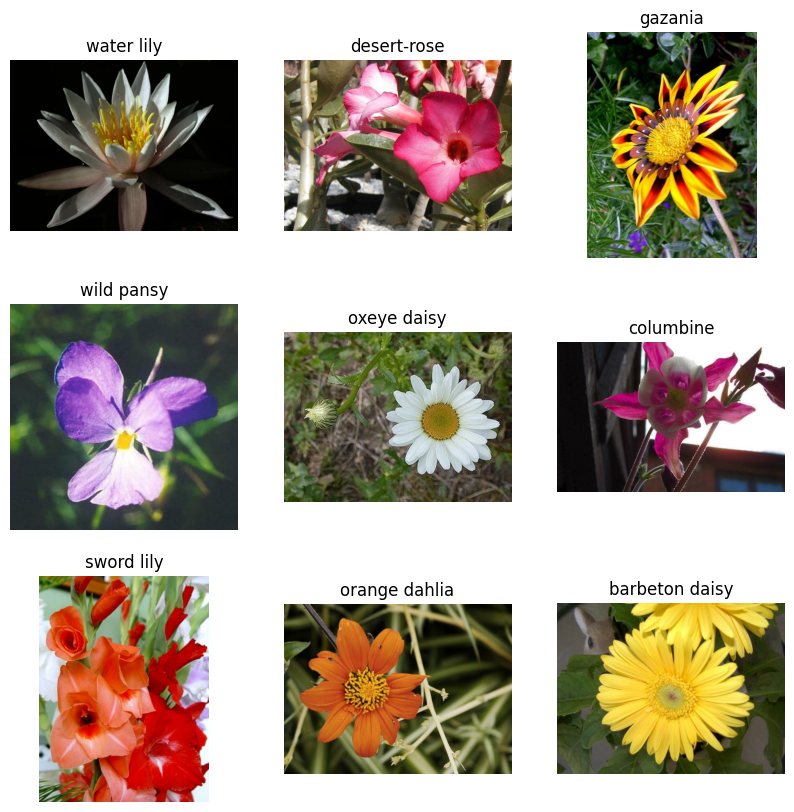

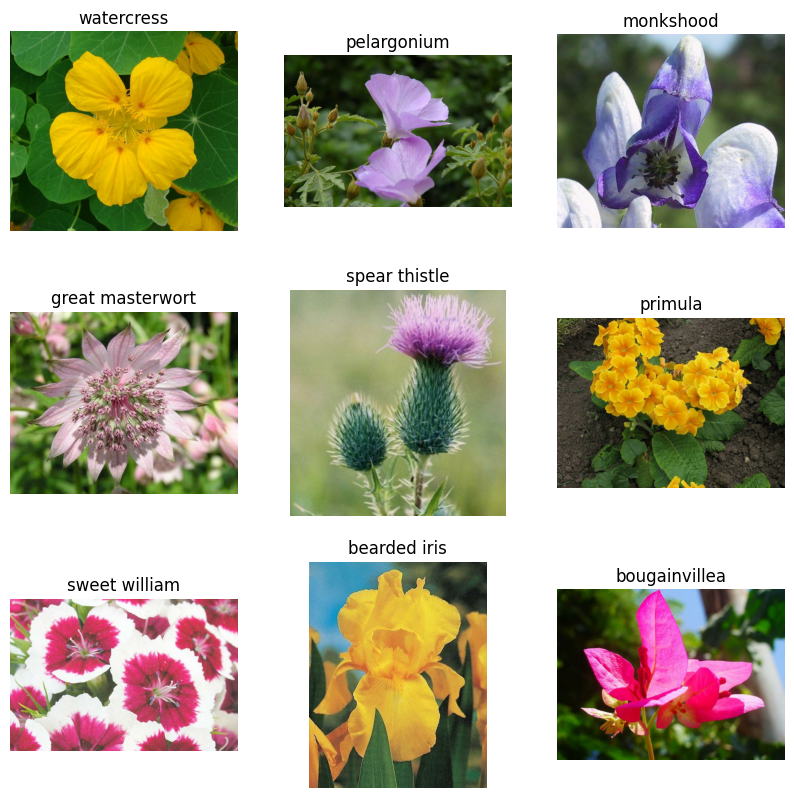

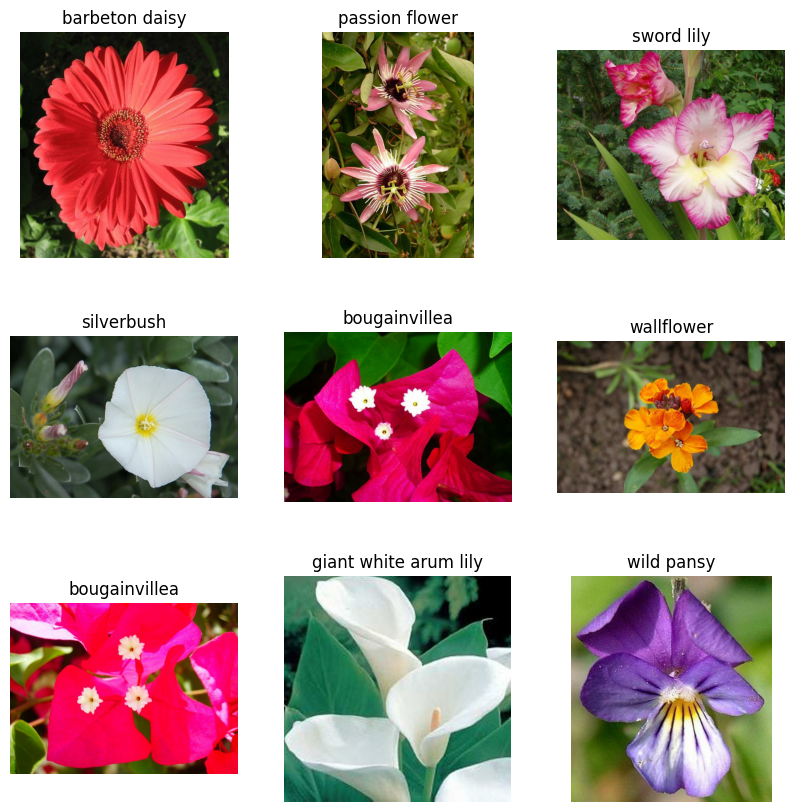

In [ ]:
dataset, info = tfds.load('oxford_flowers102', with_info=True, as_supervised=True)
class_names = info.features['label'].names

# Splitting the dataset into training, validation, and test sets
train_dataset = dataset['train']
validation_dataset = dataset['validation']
test_dataset = dataset['test']
def display_images(dataset, num_images=9):
    plt.figure(figsize=(10, 10))
    for i, (image, label) in enumerate(dataset.take(num_images).as_numpy_iterator()):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(image)
        plt.title(class_names[label])
        plt.axis('off')
    plt.show()
display_images(train_dataset)
display_images(validation_dataset)
display_images(test_dataset)

#This shows the classes and also the images, so we are able to ensure that it has got all the correct classes.

In [ ]:
img_height, img_width = 224, 224
num_classes = 2
# Creating the model as per the labs, I also fine-tune it in case I am not getting the results hence the model will
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(num_classes, activation='softmax')

# This prints a summary of the model including the parameters
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 56, 56, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        1

In [ ]:
import os
import tensorflow as tf
import tensorflow_datasets as tfds
(train_ds, test_ds), info = tfds.load(
    'oxford_flowers102',
    with_info=True,
    as_supervised=True,
    split=['train', 'test']
)
batch_size = 32
train_ds = train_ds.map(lambda image, label: (tf.image.resize(image, (224, 224)), label))
train_ds = train_ds.batch(batch_size)
train_ds = train_ds.prefetch(tf.data.experimental.AUTOTUNE)
data_dir = info.data_dir
test_data_dir = info.data_dir
print("Train Data Directory:", data_dir)
print("Test Data Directory:", test_data_dir)
#Here we are just printing the directory to ensure we have got the right dataset, because I am using the library TFDS which imports the datasets, then I need to ensure that I am using the correct dataset


Train Data Directory: /root/tensorflow_datasets/oxford_flowers102/2.1.1
Test Data Directory: /root/tensorflow_datasets/oxford_flowers102/2.1.1
